# Propser Loan Data Analysis

## Introduction

The dataset contains peer-to-peer loan information for 113,937 loans with 81 variables on each loan from Prosper Funding LLC. I am going to explore the relationships among multiple variables using summary statistics and data  visualizations.

The outline of this project is:

Introduction

Initial Wrangling

Univariate Analysis

Bivariate Analysis

Multivariate Analysis 

Summary

## Initial Wrangling

In [1]:
#import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#load dataset
df=pd.read_csv("prosperLoanData.csv")

In [3]:
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#data exploring
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
columns = ["LoanOriginationDate","ProsperRating (Alpha)","Term","ListingCategory (numeric)","LoanOriginalAmount","BorrowerAPR","EstimatedReturn","LoanStatus","StatedMonthlyIncome","DebtToIncomeRatio","EmploymentStatus","IncomeRange","MonthlyLoanPayment","Occupation",'CreditGrade']


In [7]:
#Creating a sub dataset with required set of columns
df_sample=df[columns]
df_sample.head(5)

,LoanOriginationDate,ProsperRating (Alpha),Term,ListingCategory (numeric),LoanOriginalAmount,BorrowerAPR,EstimatedReturn,LoanStatus,StatedMonthlyIncome,DebtToIncomeRatio,EmploymentStatus,IncomeRange,MonthlyLoanPayment,Occupation,CreditGrade
0,2007-09-12 00:00:00,NaN,36,0,9425,0.16516,NaN,Completed,3083.333333,0.17,Self-employed,"$25,000-49,999",330.43,Other,C
1,2014-03-03 00:00:00,A,36,2,10000,0.12016,0.05470,Current,6125.000000,0.18,Employed,"$50,000-74,999",318.93,Professional,NaN
2,2007-01-17 00:00:00,NaN,36,0,3001,0.28269,NaN,Completed,2083.333333,0.06,Not available,Not displayed,123.32,Other,HR
3,2012-11-01 00:00:00,A,36,16,10000,0.12528,0.06000,Current,2875.000000,0.15,Employed,"$25,000-49,999",321.45,Skilled Labor,NaN
4,2013-09-20 00:00:00,D,36,2,15000,0.24614,0.09066,Current,9583.333333,0.26,Employed,"$100,000+",563.97,Executive,NaN


In [8]:
df_sample.rename(columns={'ProsperRating (Alpha)': 'ProsperRating',"ListingCategory (numeric)":"ListingCategory"},inplace = True)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [9]:
df_sample.head(5)

,LoanOriginationDate,ProsperRating,Term,ListingCategory,LoanOriginalAmount,BorrowerAPR,EstimatedReturn,LoanStatus,StatedMonthlyIncome,DebtToIncomeRatio,EmploymentStatus,IncomeRange,MonthlyLoanPayment,Occupation,CreditGrade
0,2007-09-12 00:00:00,NaN,36,0,9425,0.16516,NaN,Completed,3083.333333,0.17,Self-employed,"$25,000-49,999",330.43,Other,C
1,2014-03-03 00:00:00,A,36,2,10000,0.12016,0.05470,Current,6125.000000,0.18,Employed,"$50,000-74,999",318.93,Professional,NaN
2,2007-01-17 00:00:00,NaN,36,0,3001,0.28269,NaN,Completed,2083.333333,0.06,Not available,Not displayed,123.32,Other,HR
3,2012-11-01 00:00:00,A,36,16,10000,0.12528,0.06000,Current,2875.000000,0.15,Employed,"$25,000-49,999",321.45,Skilled Labor,NaN
4,2013-09-20 00:00:00,D,36,2,15000,0.24614,0.09066,Current,9583.333333,0.26,Employed,"$100,000+",563.97,Executive,NaN


#### What is the structure of your dataset?

The dataset is about loan details and borrower information. The dataset has 113937 observations of 81 variables.Data types including string, int and float.

## Univariate Exploration

####  Describe 3 main feature(s) of interest in your dataset?

I consider Income range, Loan amount and BorrowerAPR as main variables for my analysis.I have analysed the relationship between these variables below.


### Income Range

In [10]:
df_sample['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [11]:
# create ordinal categories for income
Salary_ranking = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
Salary_group = pd.api.types.CategoricalDtype(ordered = True, categories = Salary_ranking)
df_sample['IncomeRange'] = df_sample['IncomeRange'].astype(Salary_group)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Income Range Distribution')

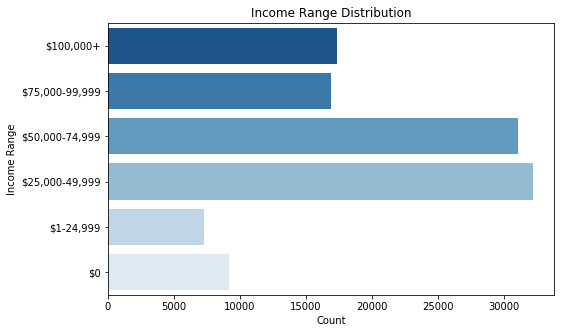

In [12]:
# bar chart
plt.figure(figsize = [8, 5])
sb.countplot(data = df_sample, y = 'IncomeRange', palette = "Blues_r")
plt.ylabel('Income Range')
plt.xlabel('Count')
plt.title('Income Range Distribution')

Looks like the number of borrowers for the 25k-49k range is almost same as the 50k-74k range. The amount of borrowers in the 75k-100k range again is almost similar to borrowers that have an income of over 100k.

### Loan Amount

In [13]:
df_sample.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

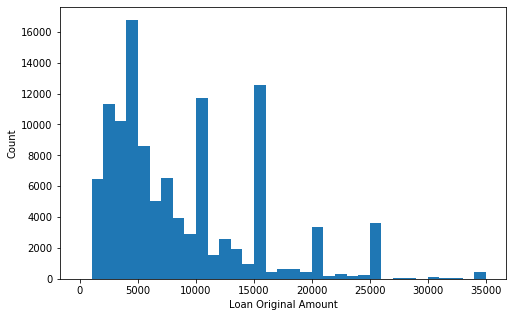

In [14]:
bins = np.arange(0, df_sample.LoanOriginalAmount.max()+1000, 1000)
plt.figure(figsize=[8, 5])
plt.hist(data = df_sample, x = 'LoanOriginalAmount', bins = bins);
plt.ylabel('Count')
plt.xlabel('Loan Original Amount');

From the histogram,Most of the loans are requested below 10000 dollars, with 4000 being the most common amount.

### Borrower APR

In [15]:
df_sample.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

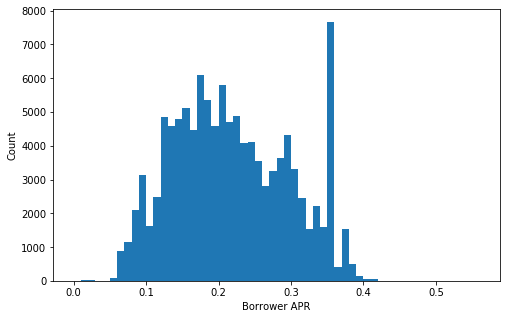

In [16]:
bins = np.arange(0, df_sample.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_sample, x = 'BorrowerAPR', bins = bins);
plt.ylabel('Count')
plt.xlabel('Borrower APR');

From the histogram, I can see a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

### Monthly Installments

In [17]:
df_sample.MonthlyLoanPayment.describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

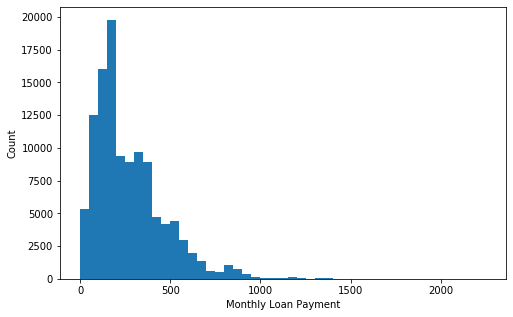

In [18]:
bins = np.arange(0, df_sample.MonthlyLoanPayment.max()+25, 50)
plt.figure(figsize=[8, 5])
plt.hist(data = df_sample, x = 'MonthlyLoanPayment', bins = bins);
plt.ylabel('Count')
plt.xlabel('Monthly Loan Payment');

From the histogram, I found that most of the monthly loan payments are less than 1000 dollars, with most common payment amount per month between 170-210 $.

### Borrower Credit Rating

In [19]:
df_sample.ProsperRating.value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating, dtype: int64

In [20]:
# convert string to ordinal category type
PR_ranking = ['AA', 'A', 'B', 'C', 'D', 'E','HR']
Pr_order = pd.api.types.CategoricalDtype(ordered = True, categories = PR_ranking)
df_sample['ProsperRating'] = df_sample['ProsperRating'].astype(Pr_order)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Borrower Ratings')

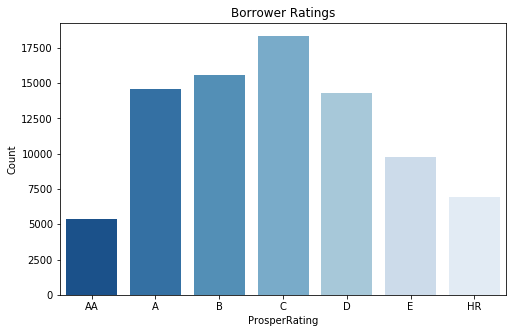

In [21]:
# bar chart
plt.figure(figsize = [8, 5])
sb.countplot(data = df_sample, x = 'ProsperRating', palette = "Blues_r")
plt.ylabel('Count')
plt.xlabel('ProsperRating')
plt.title('Borrower Ratings')

#### What are your supporting variables which help us understand the primary features in depth?

To understand more about the loan data, I have to include prosper rating and term variable.

## Bivariate Exploration

### Relationship between Loan Amount, Borrower APR and Monthly EMI  variables

In [22]:
vars_plot = ['LoanOriginalAmount','BorrowerAPR','MonthlyLoanPayment']

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


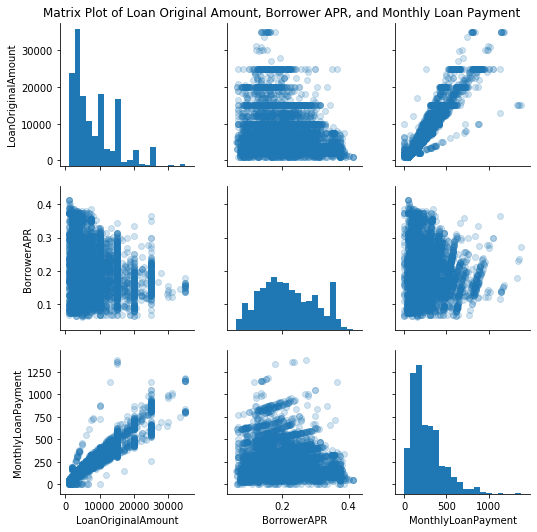

In [23]:
df_samp2=df_sample.sample(5000)

g = sb.PairGrid(data = df_samp2, vars = vars_plot)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);
g.fig.suptitle('Matrix Plot of Loan Original Amount, Borrower APR, and Monthly Loan Payment')
g.fig.subplots_adjust(top = .95);

The scatter plot also shows that these loan original Amount and Borrower APR variables are negatively correlated, which is true,if the loan amount increases, the APR decreases. The loan original amount and the  monthly loan payments , it makes sense since more the loan amount the monthly loan payment increase.

### Relationship between Loan Amount,  Monthly EMI  and Term variables

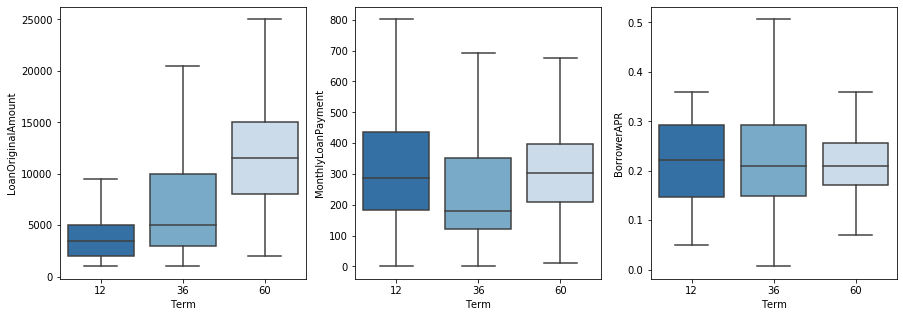

In [24]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 3, 1)
base_color = sb.color_palette()[0]
plt.xlim(0,.2)
sb.boxplot(data = df_sample, y = 'LoanOriginalAmount', x = 'Term', palette = "Blues_r", showfliers = False)

plt.subplot(1, 3, 2)
base_color = sb.color_palette()[0]
plt.xlim(0,.2)
sb.boxplot(data = df_sample, y = 'MonthlyLoanPayment', x = 'Term', palette = "Blues_r", showfliers = False);

plt.subplot(1, 3, 3)
base_color = sb.color_palette()[0]
plt.xlim(0,.2)
sb.boxplot(data = df_sample, y = 'BorrowerAPR', x = 'Term', palette = "Blues_r", showfliers = False);


From the above boxplot, we can see a positive relation between loan amount and term, i.e. as the term increase the loan amount increase.Also, the mean borrowerAPR for the terms 36 and 60 is less 12 months term.

### Relationship between Loan Amount,  Monthly EMI  and  Prosper rating variables

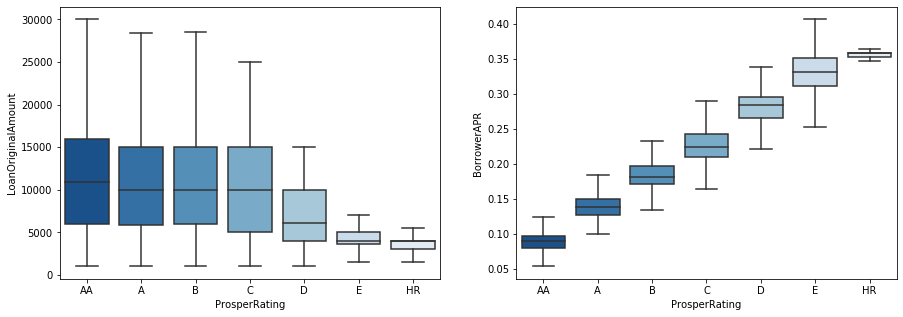

In [25]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
plt.xlim(0,.2)
sb.boxplot(data = df_sample, y = 'LoanOriginalAmount', x = 'ProsperRating', palette = "Blues_r", showfliers = False)

plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
plt.xlim(0,.2)
sb.boxplot(data = df_sample, y = 'BorrowerAPR', x = 'ProsperRating', palette = "Blues_r", showfliers = False);


From the above boxplot, we can see a positive relation between loan amount and prosper rating, i.e. customers with better rating have can get loans for higher amounts. 
In the 2nd plot we see customers with better ratings have lower borrowerAPR i.e. borrower APR and prosper rating are negatively corellated.

### BorrowerAPR VS Loan Original Amount

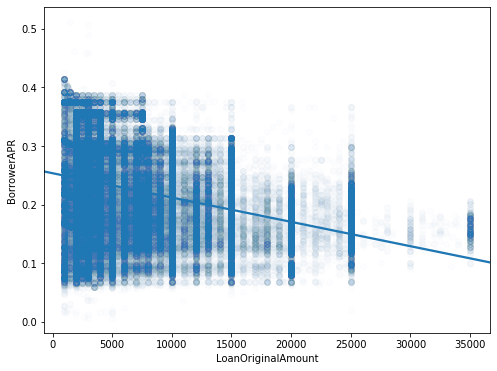

In [26]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df_sample, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

This plot shows that the range of APR decrease with the increase of loan amount. Overall, the borrower APR is negatively correlated with loan amount.

## Multivariate Exploration

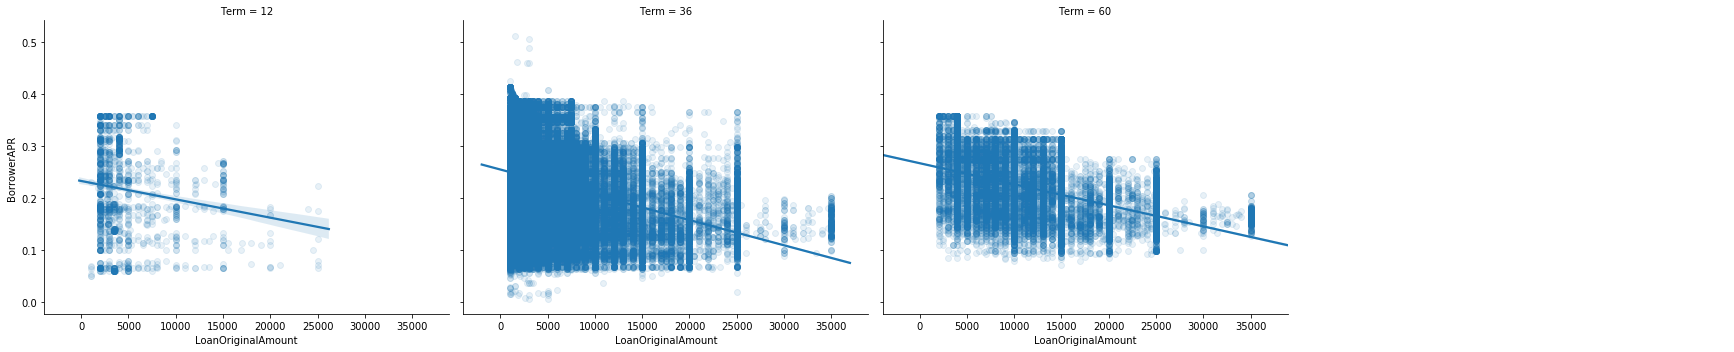

In [27]:
g=sb.FacetGrid(data=df_sample, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

The relationship between borrowerAPR and loan original amount remain same with the increase of term. Term doesn't seem to have effect on relationship of APR and loan amount

In [28]:
df_sample.shape

(113937, 15)

### Explore BorrowerAPR, Prosper rating and Term 

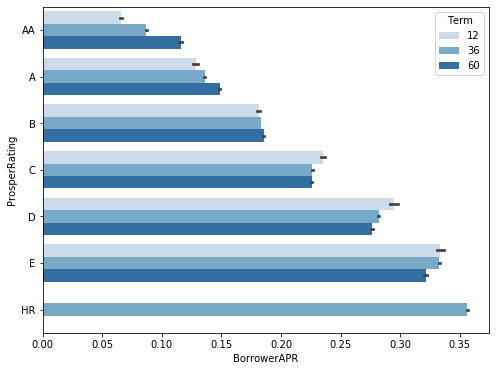

In [29]:
fig = plt.figure(figsize = [8,6])
ax = sb.barplot(data = df_sample, y = 'ProsperRating', x = 'BorrowerAPR', hue = 'Term', palette = 'Blues');

Interestingly,for customers with rating AA-B ratings, the APR increase with the increase of borrow term. However,for customers with rating C-HR, the borrower APR decrease with the increase of borrow term.

Lets, look at the rating and term effects on monthly payments and loan original amount variables

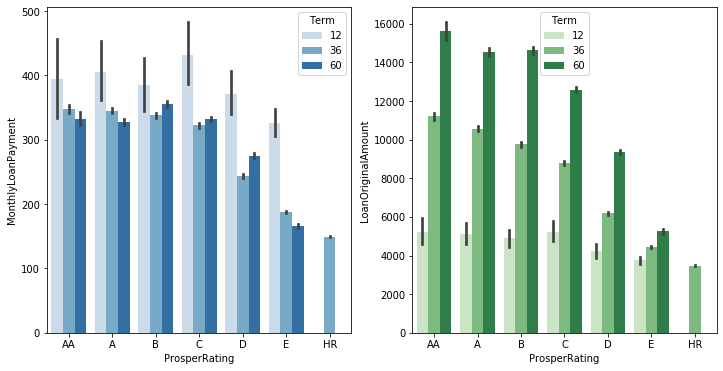

In [30]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.barplot(data = df_sample, x = 'ProsperRating', y = 'MonthlyLoanPayment', hue = 'Term', palette = 'Blues',dodge = True,ax=ax[0])
sb.barplot(data = df_sample, x = 'ProsperRating', y = 'LoanOriginalAmount', hue = 'Term', palette = 'Greens',dodge = True,ax=ax[1]);


For monthly loan payment,the pattern of term looks similar among different ratings. But for loan amount, there is a interaction between term and rating. We can see that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
To understand my key metrics more, I inclued prosper rating and term variables.With this change, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA. Also,we can see that with better Prosper rating, the loan amount of all three terms increases, the increase in the size of loan amount between terms also becomes larger.


#### Were there any interesting or surprising interactions between features?
Interestingly,for customers with rating AA-B ratings, the APR increase with the increase of borrow term. However,for customers with rating C-HR, the borrower APR decrease with the increase of borrow term.

## Summary

In this project I selected a dataset from Prosper.com which includes 81 variables and 113,937 observations. I filtered the the variables I needed for my analysis and created a sub dataset. 

I got some ideas of individual variable with use of bar charts and histograms. In the next step, I started to explore the relations among variables, especially those related to  our target variable.  I used the scatter  matrix which shows multiple comparisons at once. 

Finally to analyze and visulalize multiple variables I used barplot with color as my 3rd variable. The color here reperents the 3rd variable, a catagorical variable.
